### Download code from github

In [1]:
!git clone https://github.com/Xie-vivi/CoSTr-GCN_Projet_UV.git

Cloning into 'CoSTr-GCN_Projet_UV'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 355 (delta 52), reused 102 (delta 48), pack-reused 245
Receiving objects: 100% (355/355), 280.77 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (245/245), done.


In [ ]:
# download shrec21 dataset
# import os
# !wget -P /content/data/SHREC21 https://univr-vips.github.io/Shrec21/training_set.zip
# !wget -P /content/data/SHREC21 https://univr-vips.github.io/Shrec21/test_set.zip
# data_path="/content/CoSTr-GCN/data/SHREC21"
# if not os.path.exists(data_path):                   #判断是否存在文件夹如果不存在则创建为文件夹
# 		os.makedirs(data_path) 
# !unzip  -o -d /content/CoSTr-GCN/data/SHREC21 /content/data/SHREC21/test_set.zip
# !unzip  -o -d /content/CoSTr-GCN/data/SHREC21 /content/data/SHREC21/training_set.zip

### Install libraries

In [2]:
!pip install -r /content/CoSTr-GCN_Projet_UV/requirements.txt
!pip install ttictoc
!pip install pytorch_lightning==1.8.6
!pip install continual-inference==0.17.1
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 125.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 KB 46.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torch==1.11.0+cu113 (from versions: 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1)
ERROR: No matching distribution found for torch==1.11.0+cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
    

### Change working dir


In [3]:
import os
print(os.getcwd())
path = "/content/CoSTr-GCN_Projet_UV"
os.chdir(path)
print(os.getcwd())

/content
/content/CoSTr-GCN_Projet_UV


### Import the dependences

In [4]:
from utils.training_tools import training_loop
from utils.online_evaluation_utils import load_model
from data_loaders.graph import Graph
from model import CoSTrGCN
import torch
from utils.online_evaluation_utils import init_data_loader, get_window_label
import json
from ttictoc import tic, toc
from tqdm import tqdm
from utils.online_evaluation_utils import *
from torchmetrics.functional import confusion_matrix
import numpy as np
from utils.online_evaluation_utils import Metrics
from torchmetrics.functional import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Train the model

IPN



100%|██████████| 148/148 [00:36<00:00,  4.03it/s]


Number of gestures per class in the original training set :
Class B0A has 745 samples
Class B0B has 743 samples
Class G01 has 148 samples
Class G02 has 148 samples
Class G03 has 148 samples
Class G04 has 149 samples
Class G05 has 148 samples
Class G06 has 148 samples
Class G07 has 148 samples
Class G08 has 148 samples
Class G09 has 148 samples
Class G10 has 148 samples
Class G11 has 148 samples
training
Number of gestures per class in the training set after data sampling:
Class B0A has 150 samples
Class B0B has 150 samples
Class G01 has 146 samples
Class G02 has 148 samples
Class G03 has 148 samples
Class G04 has 149 samples
Class G05 has 148 samples
Class G06 has 148 samples
Class G07 has 148 samples
Class G08 has 148 samples
Class G09 has 148 samples
Class G10 has 146 samples
Class G11 has 148 samples
Augmenting data ....
Number of gestures per class in the training set after augmentation:
Class B0A has 450 samples
Class B0B has 450 samples
Class G01 has 438 samples
Class G02 has 444


100%|██████████| 52/52 [00:13<00:00,  3.85it/s]


Number of gestures per class in the original test set :
Class B0A has 265 samples
Class B0B has 264 samples
Class G01 has 52 samples
Class G02 has 52 samples
Class G03 has 52 samples
Class G04 has 52 samples
Class G05 has 52 samples
Class G06 has 52 samples
Class G07 has 52 samples
Class G08 has 52 samples
Class G09 has 52 samples
Class G10 has 52 samples
Class G11 has 52 samples
test
IPN
test data num:  1097


INFO:pytorch_lightning.utilities.rank_zero:Using 16bit native Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type                      | Params
---------------------------------------------------------------
0 | loss             | CrossEntropyLoss          | 0     
1 | train_acc        | MulticlassAccuracy        | 0     
2 | valid_acc        | MulticlassAccuracy        | 0     
3 | test_acc         | MulticlassAccuracy        | 0     
4 | confusion_matrix | MulticlassConfusionMatrix | 0     
5 | gcn              | SGCN            


init model.............
d_model (the number of expected features in the encoder inputs/outputs):128
Number of heads :8
dropout rate :0.3
Learning rate 0.001


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved. New best score: 0.355


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.094 >= min_delta = 1e-08. New best score: 0.449


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.080 >= min_delta = 1e-08. New best score: 0.529


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.049 >= min_delta = 1e-08. New best score: 0.578


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.004 >= min_delta = 1e-08. New best score: 0.582


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.017 >= min_delta = 1e-08. New best score: 0.599


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.050 >= min_delta = 1e-08. New best score: 0.649


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.013 >= min_delta = 1e-08. New best score: 0.662


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.063 >= min_delta = 1e-08. New best score: 0.725


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.017 >= min_delta = 1e-08. New best score: 0.742


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.012 >= min_delta = 1e-08. New best score: 0.754


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.006 >= min_delta = 1e-08. New best score: 0.760


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.004 >= min_delta = 1e-08. New best score: 0.764


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.017 >= min_delta = 1e-08. New best score: 0.781


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.002 >= min_delta = 1e-08. New best score: 0.782


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.008 >= min_delta = 1e-08. New best score: 0.790


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.006 >= min_delta = 1e-08. New best score: 0.796


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.001 >= min_delta = 1e-08. New best score: 0.797


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_accuracy improved by 0.009 >= min_delta = 1e-08. New best score: 0.807


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_accuracy did not improve in the last 15 records. Best score: 0.807. Signaling Trainer to stop.


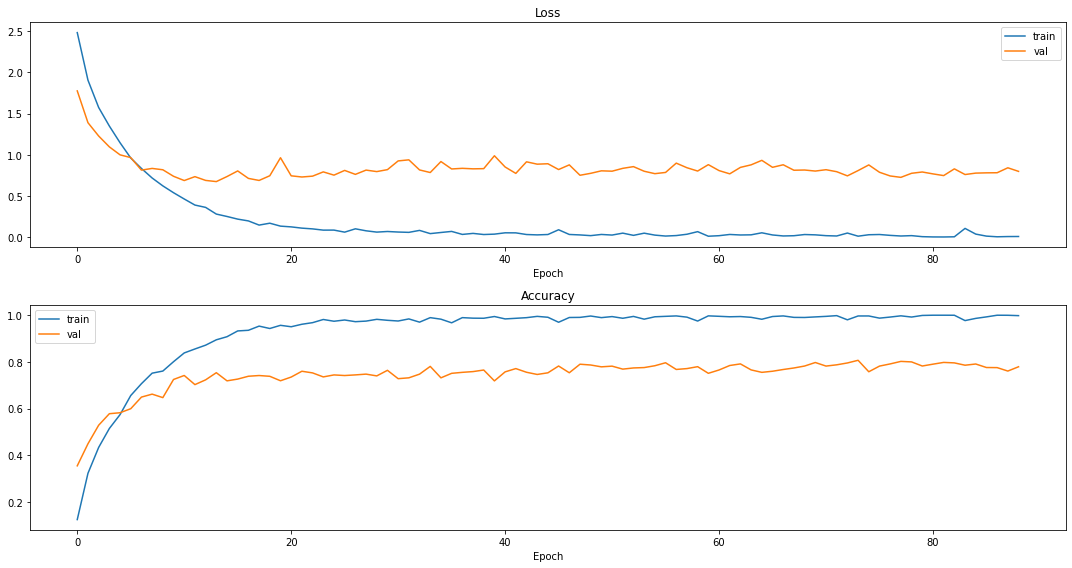

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8068335056304932
        test_loss            0.808146059513092
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 0.808146059513092, 'test_accuracy': 0.8068335056304932}]


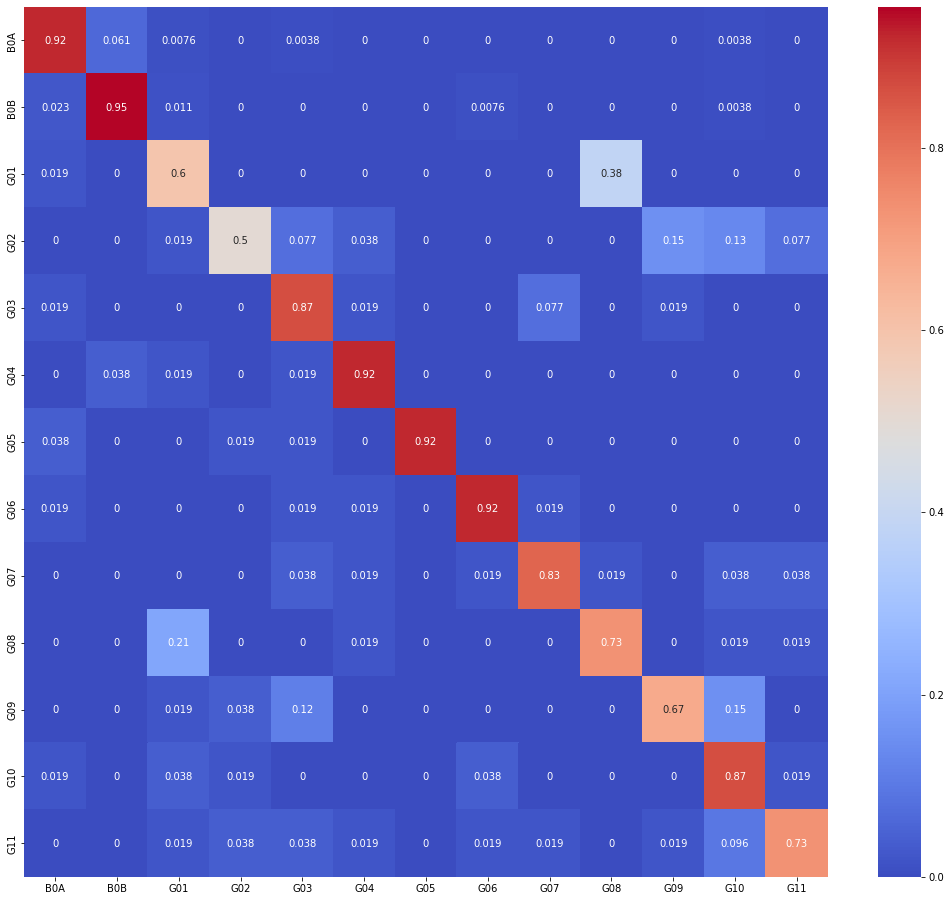

In [ ]:
batch_size = 32
window_size = 30
is_gesture_nogesture_model = False
num_classes = 2 if is_gesture_nogesture_model else 13
d_model = 128
n_heads = 8
Max_Epochs = 500
Early_Stopping = 15
lr=1e-3
dropout_rate = .3
trained_models_path= "./models/CoSTrGCN-model/IPN"

model_params=(
    window_size,
    d_model,
    n_heads,
    dropout_rate,
    is_gesture_nogesture_model
)
training_params=(
    batch_size,
    Max_Epochs,
    Early_Stopping,
    lr,
    trained_models_path
)
training_loop(model_params, training_params, num_classes, dataset_name="IPN")

### Load the **model**

In [10]:
# model params
window_size = 30
memory_size = 30
stride = 1
input_shape = (memory_size, 21, 3)
num_classes = 13
labels = ["B0A","B0B","G01","G02","G03","G04","G05","G06","G07","G08","G09","G10","G11"]
num_heads = 8
d_model = 128
n_heads = 8
dropout_rate = .3
dataset_name = "IPN"
best_model_path = f"models/CoSTrGCN-model/{dataset_name}/best_model-128-8-v2.ckpt"
graph = torch.from_numpy(Graph(layout="IPN", strategy="distance").A)
is_continual=False
# load the model
model = CoSTrGCN.load_from_checkpoint(checkpoint_path=best_model_path, is_continual=is_continual, memory_size=memory_size,
                                            adjacency_matrix=graph, labels=labels, d_model=d_model, n_heads=n_heads, num_classes=num_classes, dropout=dropout_rate)
model.eval()

IPN


CoSTrGCN(
  (loss): CrossEntropyLoss()
  (train_acc): MulticlassAccuracy()
  (valid_acc): MulticlassAccuracy()
  (test_acc): MulticlassAccuracy()
  (confusion_matrix): MulticlassConfusionMatrix()
  (gcn): SGCN(
    (conv_layers): ModuleList(
      (0): unit_gcn(
        (conv_list): ModuleList(
          (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
          (1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
          (2): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
        )
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): Mish()
      )
      (1): unit_gcn(
        (conv_list): ModuleList(
          (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        )
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): Mish()
   

In [ ]:
#function prediction 
def predict_window(window):
    w=torch.tensor(window,dtype=torch.float)
    print(w.shape)
    if len(w.shape) != 3 :
      print("Invalid window shape")
    if w.shape[1] != 21 or w.shape[2] != 3 :
      print("Invalid window shape: each frame should contain 21 joints with their 3d coordinates")
    w=w.unsqueeze(0)
    score = model(w)
    prob=torch.nn.functional.softmax(score, dim=-1) 
    score_list_labels= torch.argmax(prob, dim=-1)
    print(prob.max().item())    
    print({"label":labels[score_list_labels[0].item()],"idx":score_list_labels[0].item()})

### Test with data_loader

In [7]:
# init data loader
train_loader, val_loader, test_loader, graph, labels = init_data_loader(
    window_size, dataset_name)

IPN


100%|██████████| 148/148 [00:32<00:00,  4.52it/s]


Number of gestures per class in the original training set :
Class B0A has 745 samples
Class B0B has 743 samples
Class G01 has 148 samples
Class G02 has 148 samples
Class G03 has 148 samples
Class G04 has 149 samples
Class G05 has 148 samples
Class G06 has 148 samples
Class G07 has 148 samples
Class G08 has 148 samples
Class G09 has 148 samples
Class G10 has 148 samples
Class G11 has 148 samples
training
Number of gestures per class in the training set after data sampling:
Class B0A has 150 samples
Class B0B has 150 samples
Class G01 has 148 samples
Class G02 has 148 samples
Class G03 has 148 samples
Class G04 has 149 samples
Class G05 has 148 samples
Class G06 has 148 samples
Class G07 has 148 samples
Class G08 has 148 samples
Class G09 has 148 samples
Class G10 has 148 samples
Class G11 has 148 samples
Augmenting data ....
Number of gestures per class in the training set after augmentation:
Class B0A has 450 samples
Class B0B has 450 samples
Class G01 has 444 samples
Class G02 has 444

100%|██████████| 52/52 [00:12<00:00,  4.17it/s]

Number of gestures per class in the original test set :
Class B0A has 265 samples
Class B0B has 264 samples
Class G01 has 52 samples
Class G02 has 52 samples
Class G03 has 52 samples
Class G04 has 52 samples
Class G05 has 52 samples
Class G06 has 52 samples
Class G07 has 52 samples
Class G08 has 52 samples
Class G09 has 52 samples
Class G10 has 52 samples
Class G11 has 52 samples
test
IPN
test data num:  1101



/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
def plot_confusion_matrix(cnf_matrix, labels, filename, mode="eps", eps=1e-5):
    import seaborn as sn
    confusion_matrix_sum_vec = torch.sum(cnf_matrix, dim=1) + eps

    confusion_matrix_percentage = (
        cnf_matrix / confusion_matrix_sum_vec.view(-1, 1))

    plt.figure(figsize=(20, 18))
    sn.heatmap(confusion_matrix_percentage.cpu().numpy(), annot=True,
               cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    sn.set(font_scale=1.4)
    plt.savefig(filename, format=mode)
    plt.close()

In [11]:
# evalutation for testing set
metrics = Metrics(num_classes)
gt_labels = []
pred_labels = []
with torch.no_grad():
    for data, label,index in test_loader:
        data, label = data.cuda(), label.cuda()
        output = model(data)
        preds = torch.argmax(output, 1)
        gt_labels.append(label)
        pred_labels.append(preds)
    # val_loss = val_loss/len(test_loader.dataset)
    # gt_labels, pred_labels = np.concatenate(gt_labels), np.concatenate(pred_labels)
    gt_labels, pred_labels = torch.cat(gt_labels), torch.cat(pred_labels)
    acc = torch.sum(gt_labels==pred_labels)/pred_labels.shape[0]
    f1_score = metrics.get_f1score(torch.tensor(gt_labels.cpu()),torch.tensor(pred_labels.cpu()))
    cnf_matrix = confusion_matrix(torch.tensor(pred_labels.cpu()),torch.tensor(gt_labels.cpu()),task="multiclass", num_classes=num_classes)
    plot_confusion_matrix(cnf_matrix, labels,"./cnf_matrix.eps", mode="eps")
    print(f"acc:{acc.item()},f1_score:{f1_score.item()}")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/content/CoSTr-GCN_Projet_UV/layers/continual_transformer_layers.py:388: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attention_weights=F.softmax((Q @ K.transpose(-2,-1))/sqrt_dk)
<ipython-input-11-d2dd315f1164>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f1_score = metrics.get_f1score(tor

acc:0.8574023842811584,f1_score:0.8574023842811584


### Run the model in a video

In [13]:
gesture_dict = {
# "D0X":"Non-gesture",
"B0A":"Pointing with one finger",
"B0B":"Pointing with two fingers",		 
"G01":"Click with one finger",
"G02":"Click with two fingers",
"G03":"Throw up",
"G04":"Throw down",
"G05":"Throw left",
"G06":"Throw right",
"G07":"Open twice"	, 
"G08":"Double click with one finger",
"G09":"Double click with two fingers"	,	 
"G10":"Zoom in",
"G11":"Zoom out",
}

### Test with video

##### Test with single slide window

In [14]:
# mp_hands = mp.solutions.hands
# writer=None
# video_test_path = "/content/1CM1_4_R_#231.avi"
# position_window=[]
# video_capture = cv2.VideoCapture(video_test_path)
# length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
# print(length)
# for j in range(0):
#   video_capture.read()
# for index in range(length//10):
#   success, img = video_capture.read()
#   with mp_hands.Hands(
#     static_image_mode=True,
#     max_num_hands=2,
#     min_detection_confidence=0.7) as hands:
#       results = hands.process(cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1))
#       # print("result:")
#       position = []
#       if results.multi_hand_landmarks is not None:
#         best_hand = 0
#         # Si plus d'une seule main est detectée
#         if len(results.multi_handedness) > 1:
#           scores = [results.multi_handedness[i].classification[0].score for i in range(len(results.multi_handedness))]
#           best_hand = np.argmax(scores)

#         # Concaténation des landmarks
#         for i in range(21):
#           position.append([
#               results.multi_hand_landmarks[best_hand].landmark[i].x,
#               results.multi_hand_landmarks[best_hand].landmark[i].y,
#               results.multi_hand_landmarks[best_hand].landmark[i].z
#             ])
#         position_window.append(position)
#         if len(position_window)>30:
#           position_window = position_window[-30:]
#           w = torch.tensor([position_window],dtype=torch.float)
#           output=model(w)
#           prob = torch.nn.functional.softmax(output, dim=-1)
#           if prob.max().item()>0.95:
#             preds = torch.argmax(prob, 1)
#             cv2.putText(img,gesture_dict[labels[preds.item()]],(10,80),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255),1)
#             print(str(index)+","+str(preds)+","+str(print({"label":labels[preds.item()],"idx":preds.item(),"prob":prob.max().item()})))
#         else:
#           print("collecting frame data,frame: "+str(index))
#       else:
#         # il y a pas de main detectée
#         cv2.putText(img,"No_gesture",(10,80),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255),1)
#         print(str(index)+","+"No_gesture"+","+"D0X")
#   if writer is None:
#       fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#       writer = cv2.VideoWriter("/content/output.mp4",fourcc,30,(img.shape[1],img.shape[0]),True)
#   writer.write(img)
#   # cv2.imshow("",img)
# writer.release()

3802
0,No_gesture,D0X
1,No_gesture,D0X
2,No_gesture,D0X
3,No_gesture,D0X
4,No_gesture,D0X
5,No_gesture,D0X
6,No_gesture,D0X
7,No_gesture,D0X
8,No_gesture,D0X
9,No_gesture,D0X
10,No_gesture,D0X
11,No_gesture,D0X
12,No_gesture,D0X
13,No_gesture,D0X
14,No_gesture,D0X
15,No_gesture,D0X
16,No_gesture,D0X
17,No_gesture,D0X
18,No_gesture,D0X
19,No_gesture,D0X
20,No_gesture,D0X
21,No_gesture,D0X
22,No_gesture,D0X
23,No_gesture,D0X
collecting frame data,frame: 24
25,No_gesture,D0X
26,No_gesture,D0X
collecting frame data,frame: 27
28,No_gesture,D0X
collecting frame data,frame: 29
collecting frame data,frame: 30
collecting frame data,frame: 31
collecting frame data,frame: 32
collecting frame data,frame: 33
collecting frame data,frame: 34
collecting frame data,frame: 35
collecting frame data,frame: 36
collecting frame data,frame: 37
38,No_gesture,D0X
39,No_gesture,D0X
40,No_gesture,D0X
41,No_gesture,D0X
42,No_gesture,D0X
43,No_gesture,D0X
44,No_gesture,D0X
45,No_gesture,D0X
46,No_gesture,D0X
47,No

/content/CoSTr-GCN_Projet_UV/layers/continual_transformer_layers.py:388: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attention_weights=F.softmax((Q @ K.transpose(-2,-1))/sqrt_dk)


{'label': 'G07', 'idx': 8, 'prob': 0.9734078645706177}
98,tensor([8], device='cuda:0'),None
{'label': 'G06', 'idx': 7, 'prob': 0.9617414474487305}
105,tensor([7], device='cuda:0'),None
113,No_gesture,D0X
114,No_gesture,D0X
115,No_gesture,D0X
116,No_gesture,D0X
117,No_gesture,D0X
118,No_gesture,D0X
119,No_gesture,D0X
120,No_gesture,D0X
121,No_gesture,D0X
122,No_gesture,D0X
123,No_gesture,D0X
124,No_gesture,D0X
125,No_gesture,D0X
126,No_gesture,D0X
127,No_gesture,D0X
128,No_gesture,D0X
129,No_gesture,D0X
130,No_gesture,D0X
131,No_gesture,D0X
132,No_gesture,D0X
133,No_gesture,D0X
134,No_gesture,D0X
135,No_gesture,D0X
136,No_gesture,D0X
137,No_gesture,D0X
138,No_gesture,D0X
139,No_gesture,D0X
140,No_gesture,D0X
141,No_gesture,D0X
142,No_gesture,D0X
143,No_gesture,D0X
144,No_gesture,D0X
145,No_gesture,D0X
146,No_gesture,D0X
147,No_gesture,D0X
148,No_gesture,D0X
149,No_gesture,D0X
150,No_gesture,D0X
151,No_gesture,D0X
152,No_gesture,D0X
153,No_gesture,D0X
154,No_gesture,D0X
155,No_gesture,D0

##### Test with multiple slide window

In [25]:
mp_hands = mp.solutions.hands
writer=None
video_test_path = "/content/CoSTr-GCN_Projet_UV/test_on_video/gesture_test.mov"
position_window=[[] for i in range(3)] # init 3 sliding window 
no_hand_detected_time = 0
video_capture = cv2.VideoCapture(video_test_path)
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)
cur_gest=""
for j in range(0):
  video_capture.read()
for index in range(length):
  success, img = video_capture.read()
  with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
      results = hands.process(cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1))
      # print("result:")
      position = []
      if results.multi_hand_landmarks is not None:

        best_hand = 0
        # Si plus d'une seule main est detectée
        if len(results.multi_handedness) > 1:
          scores = [results.multi_handedness[i].classification[0].score for i in range(len(results.multi_handedness))]
          best_hand = np.argmax(scores)

        # Concaténation des landmarks
        for i in range(21):
          position.append([
              results.multi_hand_landmarks[best_hand].landmark[i].x,
              results.multi_hand_landmarks[best_hand].landmark[i].y,
              results.multi_hand_landmarks[best_hand].landmark[i].z
            ])
        position_window[0].append(position)
        if index%2==0: #down sampling of 1/2
          position_window[1].append(position)
        if index%3==0: # down sampling of 1/3
          position_window[2].append(position)
        prediction = []
        for i in range(len(position_window)):
          if len(position_window[i])>30:
            position_window[i] = position_window[i][-30:]
            w = torch.tensor([position_window[i]],dtype=torch.float)
            output=model(w)
            prob = torch.nn.functional.softmax(output, dim=-1)
            preds = torch.argmax(prob, 1)
            prediction.append([prob.max().item(),preds.item()])
        prediction = np.array(prediction)
        no_hand_detected_time=0
        if prediction.shape[0]>0:
          p = prediction[prediction[:,0].argmax()]
          if(p[0]>0.98): # threshold of prediction result
            cur_gest = gesture_dict[labels[int(p[1])]]
            print(str(index)+","+cur_gest+","+str(labels[int(p[1])]))
            cv2.putText(img,cur_gest,(10,80),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255),1)
      else:
        # il y a pas de main detectée
        no_hand_detected_time+=1
        if no_hand_detected_time>3:
          position_window=[[] for i in range(3)]
        cv2.putText(img,"No_gesture",(10,80),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255),1)
        print(str(index)+","+"No_gesture"+","+"D0X")
      
  if writer is None:
      fourcc = cv2.VideoWriter_fourcc(*'mp4v')
      writer = cv2.VideoWriter("/content/output1.mp4",fourcc,30,(img.shape[1],img.shape[0]),True)
  writer.write(img)
writer.release()

740
36,Double click with two fingers,G09
37,Double click with two fingers,G09
38,Double click with two fingers,G09
39,Double click with two fingers,G09
40,Double click with two fingers,G09
41,Double click with two fingers,G09
42,Double click with two fingers,G09
60,Double click with two fingers,G09
61,Double click with two fingers,G09
62,Double click with two fingers,G09
63,Double click with two fingers,G09
64,Double click with two fingers,G09
65,Double click with two fingers,G09
66,Double click with two fingers,G09
67,Double click with two fingers,G09
68,Double click with two fingers,G09
72,Click with two fingers,G02
73,Click with two fingers,G02
74,Double click with two fingers,G09
76,Double click with two fingers,G09
77,Double click with two fingers,G09
78,Double click with two fingers,G09
79,Double click with two fingers,G09
80,Double click with two fingers,G09
81,Double click with two fingers,G09
82,Double click with two fingers,G09
84,Double click with two fingers,G09
86,Double c

### Test the model with camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import mediapipe as mp
import numpy as np
mp_hands = mp.solutions.hands
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
position_window=[]
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
      # frame = cv2.imread(img)
      results = hands.process(cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1))
      # print("result:")
      position = []
      if results.multi_hand_landmarks is not None:
        best_hand = 0
        # Si plus d'une seule main est detectée
        if len(results.multi_handedness) > 1:
          scores = [results.multi_handedness[i].classification[0].score for i in range(len(results.multi_handedness))]
          best_hand = np.argmax(scores)

        # Concaténation des landmarks
        # position = []
        for i in range(21):
          position.append([
              results.multi_hand_landmarks[best_hand].landmark[i].x,
              results.multi_hand_landmarks[best_hand].landmark[i].y,
              results.multi_hand_landmarks[best_hand].landmark[i].z
           ])
      else:
        position = [[0,0,0] for i in range(21)]
      
      position_window.append(position)

      if len(position_window)>30:
        position_window = position_window[-30:]
        predict_window(position_window)
      else:
        print("collecting frame data")
      # # Print handedness (left v.s. right hand).
      # print(f'Handedness of {name}:')
      # print(results.multi_hand_landmarks)

<IPython.core.display.Javascript object>

collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
collecting frame data
torch.Size([30, 21, 3])
0.34952279925346375
{'label': 'D0X', 'idx': 0}
torch.Size([30, 21, 3])
0.36249810457229614
{'label': 'G01', 'idx': 3}
torch.Size([30, 21, 3])
0.36735600233078003
{'label': 'G11', 'idx': 13}
torch.Size([30, 21, 3])
0.6476984620094299
{'label': 'G10', 'idx': 12}
torch.Size([30, 21, 3])
0.6523687243461609
{'label': 'G

KeyboardInterrupt: ignored